In [26]:
import yfinance as yf
import pandas as pd
import datetime as dt

# --- Parámetros de la Descarga ---
simbolo_sp500 = "^GSPC" # Símbolo del S&P 500 en Yahoo Finance
# El rango de fechas solicitado: 30/09/2014 hasta 30/09/2025
# Ajustamos para que yfinance incluya todos los datos hasta el mes de fin.
fecha_inicio = "2014-09-01" 
fecha_fin = "2025-10-01" # Usamos el 1 de octubre para asegurar el dato de cierre de septiembre

nombre_archivo = "SP500_Mensual_2014_2025.csv"

# 1. Descargar los datos diarios en un DataFrame
print(f"Descargando datos diarios para {simbolo_sp500}...")
try:
    df_diario = yf.download(simbolo_sp500, start=fecha_inicio, end=fecha_fin)
except Exception as e:
    print(f"Error al descargar datos: {e}")
    exit()

# 2. Convertir los datos de "Cierre" (Close) de diario a mensual
# Agrupamos por mes ('M') y tomamos el precio de cierre del último día del mes (.last())
print("Convirtiendo datos diarios a mensuales...")
df_sp = df_diario['Close'].resample('M').last()
#df_mensual = df_diario['Close'].resample('M').last().to_frame()

# Limpieza y formato
df_sp.index.name = 'Fecha'
df_sp.columns = ['Precio_Cierre_SP500_USD']

# 3. Guardar el DataFrame mensual a un archivo CSV
df_sp.to_csv('sp500_mensual.csv', index=True)
#df_mensual.to_csv(sp_mensual.csv)

# 4. Confirmación
print(f"\n¡Proceso Completado! ")
#print(f"El archivo CSV '{nombre_archivo}' ha sido guardado en la carpeta actual.")
print("\nPrimeros y últimos datos del DataFrame (Mensual):")


C:\Users\juaji\AppData\Local\Temp\ipykernel_22468\1149627562.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_diario = yf.download(simbolo_sp500, start=fecha_inicio, end=fecha_fin)
[*********************100%***********************]  1 of 1 completed

Descargando datos diarios para ^GSPC...
Convirtiendo datos diarios a mensuales...

¡Proceso Completado! 

Primeros y últimos datos del DataFrame (Mensual):



C:\Users\juaji\AppData\Local\Temp\ipykernel_22468\1149627562.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sp = df_diario['Close'].resample('M').last()


In [27]:
df_sp.head()
#print("...")
#df_mensual.tail()

,Precio_Cierre_SP500_USD
Fecha,
2014-09-30,1972.290039
2014-10-31,2018.050049
2014-11-30,2067.560059
2014-12-31,2058.899902
2015-01-31,1994.989990


In [ ]:
#comprobamos el tipo de valor de la columna precio cierre
df_sp['Precio_Cierre_SP500_USD'].iloc[1]

np.float64(2018.050048828125)

In [ ]:
#comprobamos el minimo de los valores. En el excel exportado visualizo valores minimos diferentes!
df_sp['Precio_Cierre_SP500_USD'].min()

np.float64(1920.030029296875)

In [32]:
df_sp.describe()


,Precio_Cierre_SP500_USD
count,133.000000
mean,3509.504585
std,1275.186087
min,1920.030029
25%,2423.409912
50%,3100.290039
75%,4373.939941
max,6688.459961


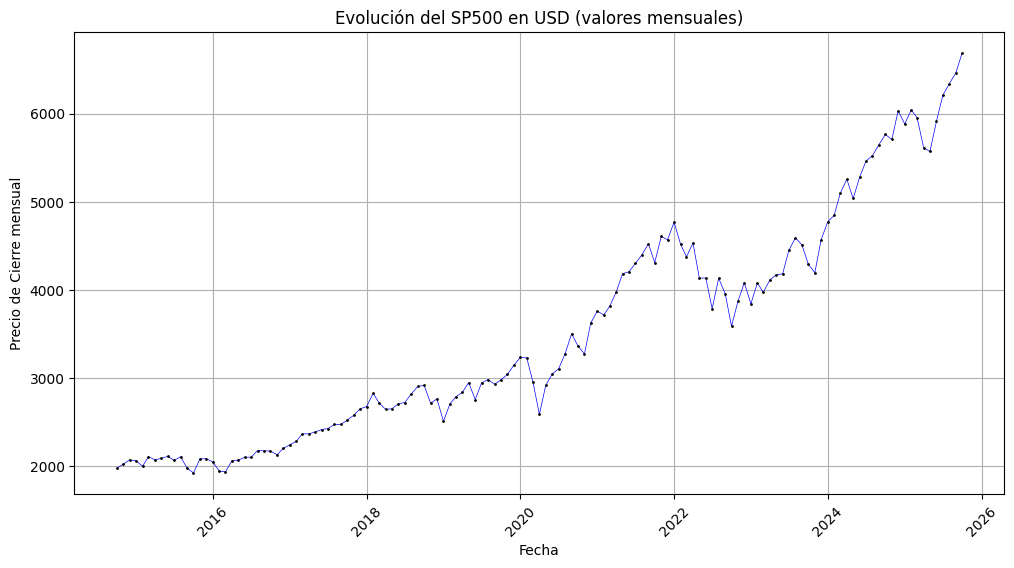

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Graficar línea con personalización
plt.plot(df_sp.index, 
         df_sp['Precio_Cierre_SP500_USD'], 
         linestyle='solid',      # Estilo de línea: 'solid', 'dashed', 'dotted', etc.
         color='blue',           # Color de la línea
         linewidth=0.5,            # Grosor de la línea
         marker='o',             # Marcadores en puntos ('o', '^', 's', etc.)
         markersize=1,           # Tamaño de los marcadores
         markerfacecolor='red',  # Color interior de los marcadores
         markeredgecolor='black')# Color del borde de los marcadores

# Añadir título y etiquetas de ejes
plt.title('Evolución del SP500 en USD (valores mensuales)')
plt.xlabel('Fecha')
plt.ylabel('Valor $')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()


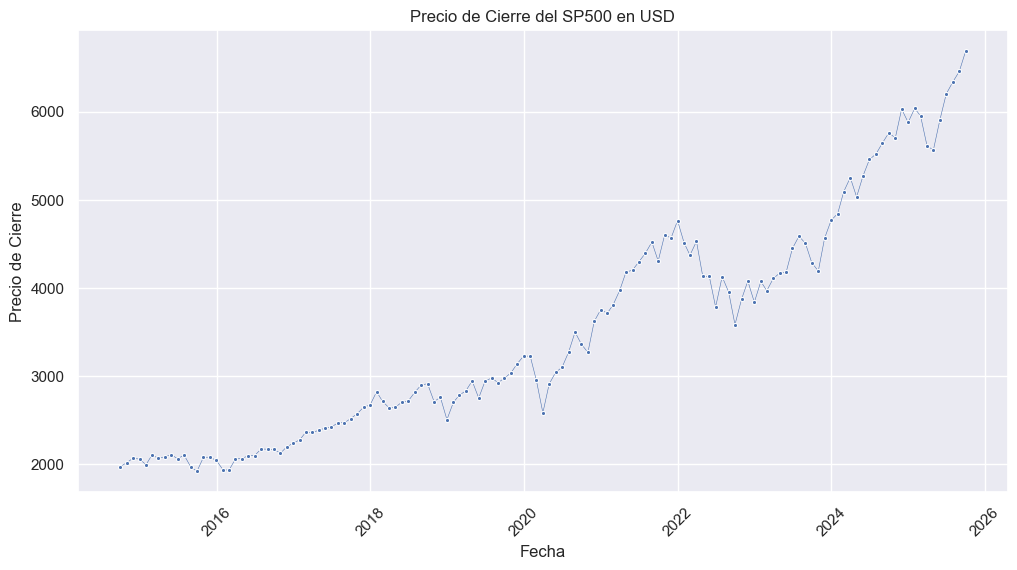

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

df_reset = df_sp.reset_index()

sns.set_theme(style="darkgrid")  # Tema y estilo de la gráfica

plt.figure(figsize=(12,6))
sns.lineplot(data=df_reset, x=df_reset.columns[0], y='Precio_Cierre_SP500_USD',
             marker='o',markersize =3, linewidth=0.4)

plt.title('Precio de Cierre del SP500 en USD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.xticks(rotation=45)
plt.show()
